<a href="https://colab.research.google.com/github/glaucio-rocha/ciencia_de_dados/blob/main/MVP/MVP_Sprint_II_pt1_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Machine Learning e Deep Learning (Sprint 2)
## Ciência de Dados & Analytics
### Aluno: Glaucio A. Rocha
### Entrega: 2023-07-23
---

In [1]:
!pip install seaborn xgboost imblearn lightgbm

## Parte 1 - Machine Learning

### Definição do Problema

#### Descrição do problema

A identificação remota de árvores doentes em regiões mais remotas, ou em plantações de árvores frutíferas, pode se transformar em um grande problema a depender da extensão da plantação (ou da floresta).
Alguns indivíduos doentes podem não estar no campo de visão de operadores humanos, que devem se deslocar, em locais de dificil acesso e com uma visão reduzida da totalidade de elementos a serem monitorados.

#### Premissas e hipóteses

Este MVP assume como hipótese, a existência de dados de radar e multispectrais com resolução espacial e temporal adequadas, para realizar este monitoramento.

Assumimos como premisa a utilização de um Dataset pré-otimizado, já que não é o objetivo desta atividade a preparação de dados com rigor cartográfico, feito a partir de dados de imagens multispectrais e de radar oriundos de diversos satélites.



#### 1.1.4 Descrição do dataset

Este conjunto de dados contém alguns dados de treinamento e teste de um estudo de sensoriamento remoto realizado por Johnson et al. (2013), que envolveu a detecção de árvores doentes em imagens do satélite Quickbird. Há poucas amostras de treinamento para a classe de 'árvores doentes' (74) e muitas para a classe de 'outros tipos de cobertura terrestre' (4265).

O conjunto de dados consiste em segmentos de imagens, gerados através da segmentação da imagem de satélite. Os segmentos contêm informações espectrais das bandas multiespectrais da imagem Quickbird e informações de textura da banda da imagem pancromática (Pan).

In [2]:
# Preparação do ambiente
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from joblib import parallel_backend


In [3]:
# Importação do dataset
url = "https://raw.githubusercontent.com/anushamanur/Wilt/master/training.csv"
url2 = "https://raw.githubusercontent.com/anushamanur/Wilt/master/testing.csv"

colunas = ['label','GLCM_Pan','Mean_G','Mean_R','Mean_NIR','SD_Pan']


# Lê o arquivo
ds_train = pd.read_csv(url, header=None, names=colunas)
ds_test = pd.read_csv(url2, header=None, names=colunas)
ds_test.head()

,label,GLCM_Pan,Mean_G,Mean_R,Mean_NIR,SD_Pan
0,0,109.828571,183.700000,82.950000,251.750000,16.079412
1,0,130.284483,212.637931,96.896552,482.396552,21.210295
2,0,131.386555,185.466667,85.466667,419.666667,13.339998
3,0,141.345098,180.875000,81.500000,348.062500,18.213577
4,1,121.383408,218.357143,112.017857,426.607143,19.083196


### 1.2 Preparação dos dados



#### 1.2.1 Separação dos dados (treino e teste)

In [4]:
test_size = 0.2 # tamanho do conjunto de teste
seed = 7 # semente aleatória

X_train = ds_train.iloc[:, 1:]  # Todas as colunas, exceto a primeira (alvo)
y_train = ds_train.iloc[:, 0]   # Primeira coluna (alvo)

X_test = ds_test.iloc[:, 1:]  # Todas as colunas, exceto a primeira (alvo)
y_test = ds_test.iloc[:, 0]   # Primeira coluna (alvo)

# Criar conjuntos de treino e teste usando train_test_split do sklearn
# Vamos usar 80% dos dados para treino e 20% para teste, mas você pode ajustar esses valores conforme necessário.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


# Parâmetros e partições da validação cruzada
scoring = 'f1'
num_particoes = 5
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [5]:
X_train

,GLCM_Pan,Mean_G,Mean_R,Mean_NIR,SD_Pan
0,120.362774,205.500000,119.395349,416.581395,20.676318
1,124.739583,202.800000,115.333333,354.333333,16.707151
2,134.691964,199.285714,116.857143,477.857143,22.496712
3,127.946309,178.368421,92.368421,278.473684,14.977453
4,135.431548,197.000000,112.690476,532.952381,17.604193
...,...,...,...,...,...
4334,111.568773,203.588235,93.264706,403.735294,26.512777
4335,125.435240,206.394161,93.058394,512.270073,33.466060
4336,132.123859,465.343750,295.333333,499.250000,38.762967
4337,124.469536,215.152632,98.484211,675.915789,28.506542


#### 1.2.2 Validação cruzada

#### 1.2.3 Transformação de dados

#### 1.2.4 _Feature selection_

### 1.3 Modelagem e treinamento



#### 1.3.1 Seleção de algoritmos

In [6]:
from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import xgboost as xgb
import lightgbm as lgb

from imblearn.over_sampling import SMOTE


LR: 0.985309 (0.000980)
RF: 0.996959 (0.001352)
Ada: 0.996145 (0.001674)
XGB: 0.995449 (0.001126)
LGBM: 0.996958 (0.001751)


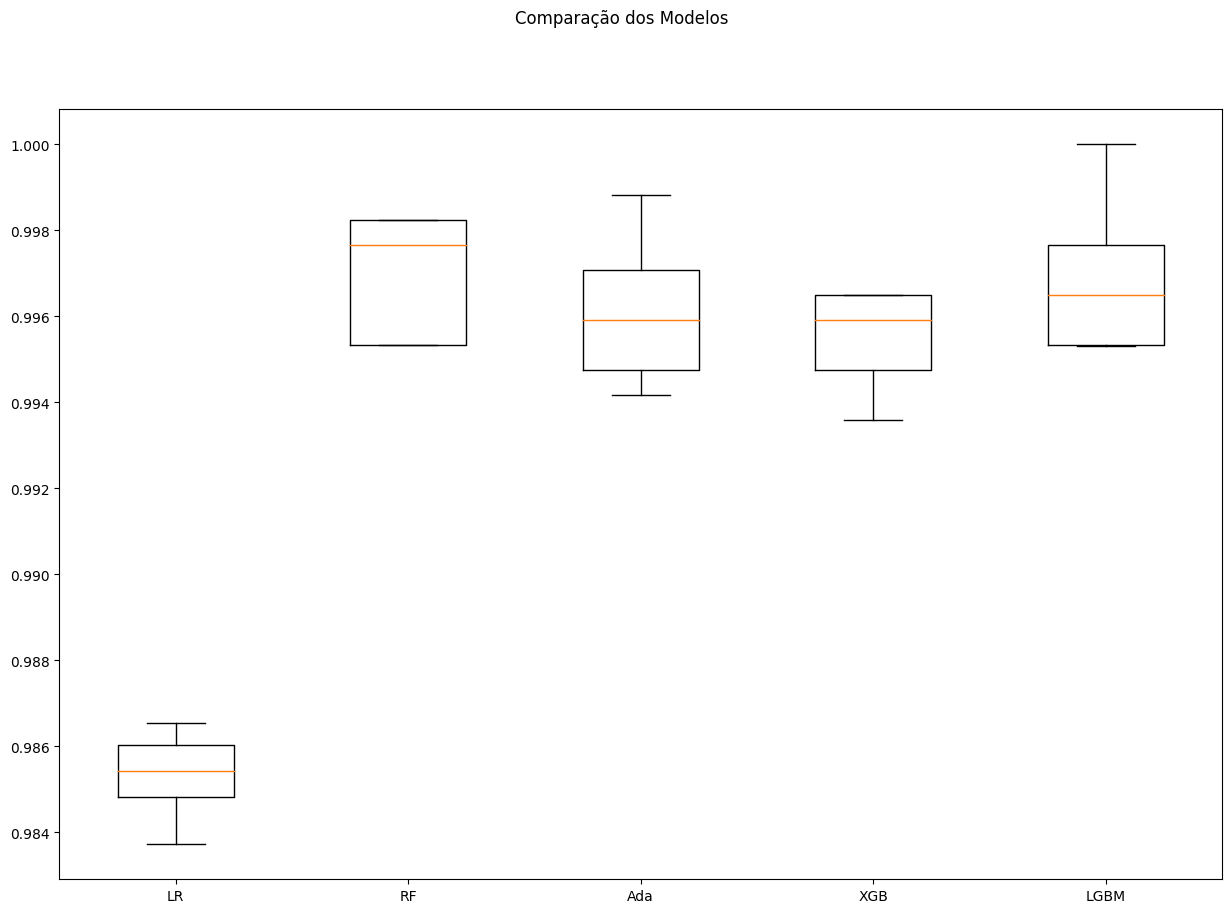

In [7]:
np.random.seed(seed) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))

num_trees = 100
max_features = 3

# Criando os ensembles e adicionando-os na lista de modelos
#models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features, class_weight='balanced')))
# models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
# models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('XGB', xgb.XGBClassifier(scale_pos_weight=sum(y_train == 0) / sum(y_train == 1), random_state=seed)))
models.append(('LGBM',lgb.LGBMClassifier(force_col_wise=True) ))


#models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []


sm = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=seed)
X_train, y_train = sm.fit_resample(X_train,y_train)


# Avaliação dos modelos
for name, model in models:
      cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
      print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


#### 1.3.2 Avaliação do treinamento

#### 1.3.3 Otimização de hiperparâmetros



In [ ]:
# Tuning do lightgbm

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
lgbmodel = ('lgbm', lgb.LGBMClassifier(force_col_wise=True))

standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('lgbm', Pipeline(steps=[lgbmodel])))


param_grid = {
    'lgbm__verbose':[-1],
    'lgbm__boosting_type': ['dart', 'goss'],          # tipos de boosting diferentes
    'lgbm__num_leaves': [31, 63],
    'lgbm__max_depth': [3, 5],                        # profundidade máxima
    'lgbm__learning_rate': [0.01, 0.1],               # Learning rate
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("%s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

lgbm - Melhor: 0.997544 usando {'lgbm__boosting_type': 'goss', 'lgbm__learning_rate': 0.1, 'lgbm__max_depth': 5, 'lgbm__num_leaves': 31, 'lgbm__verbose': -1}


### 1.4 Análise de Resultados

#### 1.4.1 Métricas de avaliação

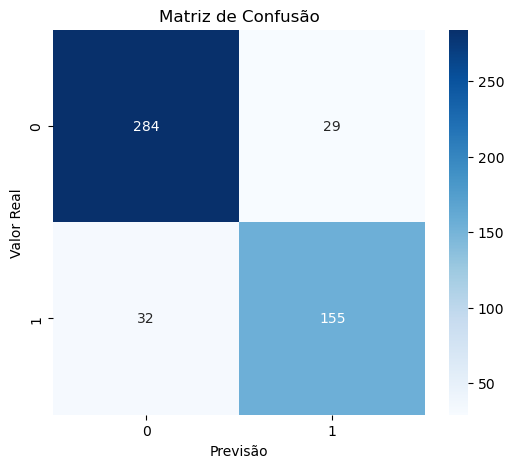

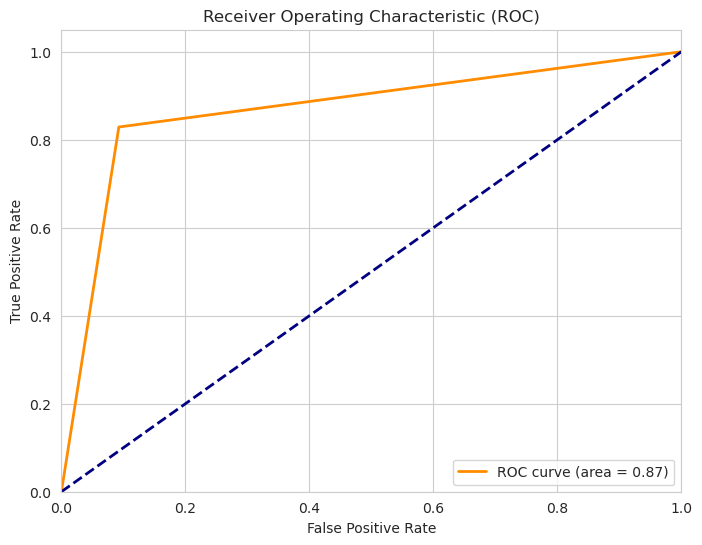

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

model =  lgb.LGBMClassifier(force_col_wise=True,
                            boosting_type='goss',
                            learning_rate=0.1,
                            max_depth=5,
                            num_leaves=31,
                            verbose=-1
                           )

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calcular a matriz de confusão e roc curve
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Matriz de confusão usando Seaborn
plt.figure(figsize=(6, 5))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()


plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report


# Calcular as métricas F1-score e AUC-ROC
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Imprimir as métricas
print("Métricas de Avaliação:")
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)

# Imprimir o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Métricas de Avaliação:
F1-score: 0.8355795148247979
AUC-ROC: 0.8681126240795476

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       313
           1       0.84      0.83      0.84       187

    accuracy                           0.88       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.88      0.88      0.88       500



#### 1.4.2 Teste do modelo

#### 1.4.3 Avaliação do modelo

#### 1.4.4 Conclusões

#### 1.4.5 Próximos passos